In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read in the data
adult_df = pd.read_csv("adult.data")

In [ ]:
# Check for NaN values
adult_df.isna().sum()

Age                0
 Work class        0
 FNLWGT            0
 Education         0
 Education Num     0
 Martial status    0
 Occupation        0
 Relationship      0
 Race              0
 Sex               0
 Capital Gain      0
 Capital Loss      0
 Hours per week    0
 Native Country    0
 Class             0
dtype: int64

In [ ]:
# Check to see the unique values in the " Work class" column
adult_df[' Work class'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
# View our dataframe
adult_df.head()

,Age,Work class,FNLWGT,Education,Education Num,Martial status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult_df[' Class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
adult_df.shape

(32561, 15)

In [ ]:
# Encoding the categorical variables
adult_df[' Sex'] = adult_df[' Sex'].map({' Male': 0, ' Female':1})
adult_df[' Class'] = adult_df[' Class'].map({' <=50K': 0, ' >50K':1})

In [ ]:
adult_df.head()

,Age,Work class,FNLWGT,Education,Education Num,Martial status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


<ipython-input-60-b7dd1d46b481>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(adult_df.corr(), annot = True)


<Axes: >

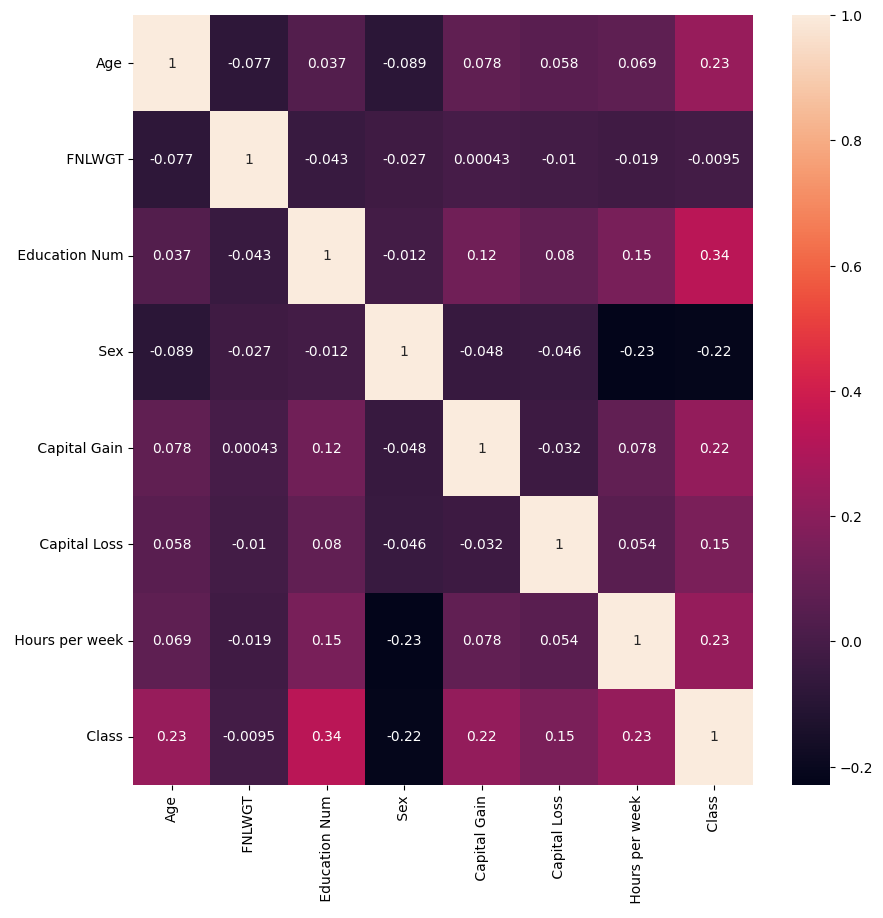

In [ ]:
# Check for multicollinearity
plt.figure(figsize = (10, 10))

sns.heatmap(adult_df.corr(), annot = True)

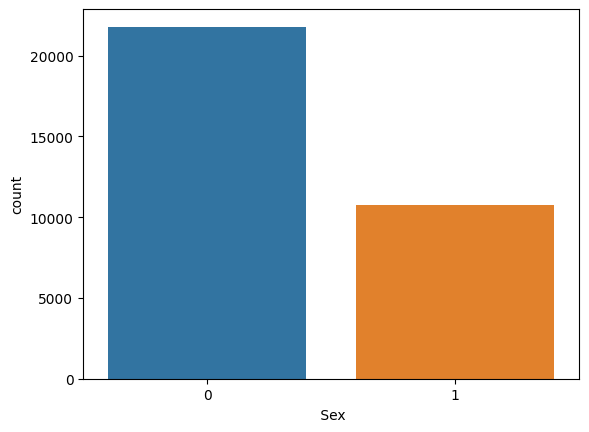

In [ ]:
# Show how many males and females there are
sns.countplot(x = ' Sex', data = adult_df)
plt.show()

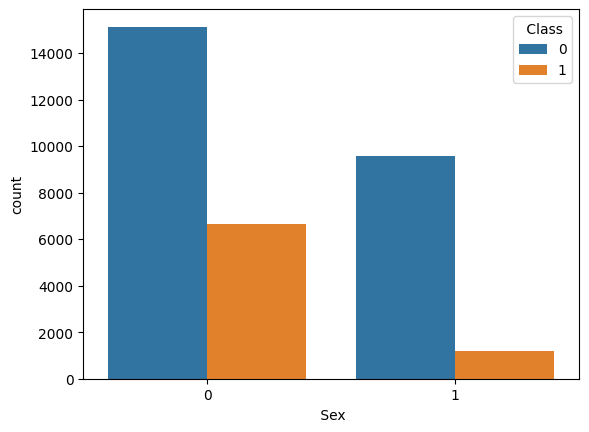

In [ ]:
# Depict relationship between Sex and Capital Gain. The disparity between male and female salaries are very high
sns.countplot(x = ' Sex', hue = ' Class', data = adult_df)
plt.show()

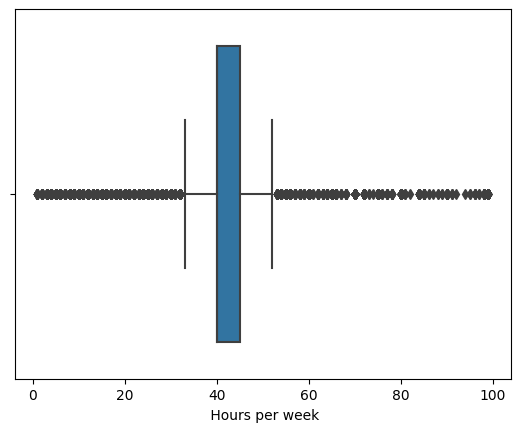

In [ ]:
# Check for outliers in the "hours per week" feature
sns.boxplot(x = ' Hours per week', data = adult_df)
plt.show()

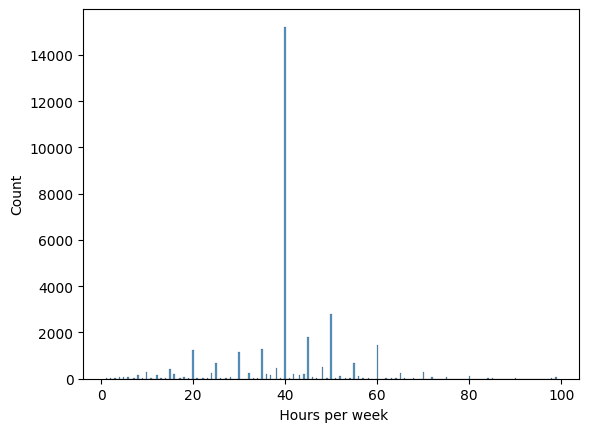

In [ ]:
# 40 hrs per week is the median, however, there are many scattered outliers ranging from 0 - 100 hours per week
sns.histplot(x = ' Hours per week', data = adult_df)
plt.show()

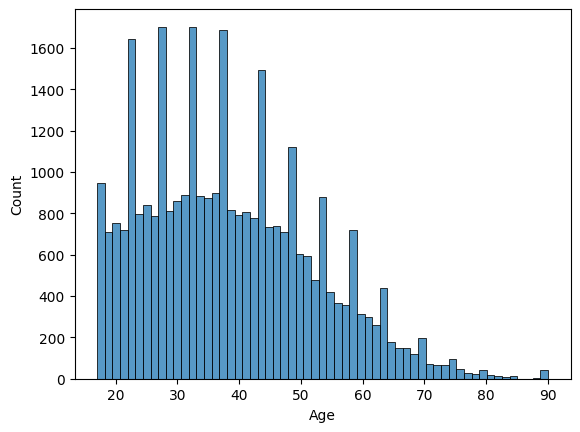

In [ ]:
# Data is skewed to the right
sns.histplot(x = 'Age', data = adult_df)
plt.show()

In [ ]:
# creating a new set of features for each categorical column using one-hot encoding (preprocessing)
dummy_df = pd.get_dummies(adult_df[[' Work class', ' Education', ' Martial status', ' Occupation', ' Relationship', ' Race', ' Native Country']] )
dummy_df.head()
adult_df = pd.concat([adult_df, dummy_df], axis=1)

In [ ]:
adult_df.drop([' Work class', ' Education', ' Martial status', ' Occupation', ' Relationship', ' Race', ' Native Country'], inplace=True, axis=1)

In [ ]:
adult_df.head()

,Age,FNLWGT,Education Num,Sex,Capital Gain,Capital Loss,Hours per week,Class,Work class_ ?,Work class_ Federal-gov,...,Native Country_ Portugal,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = adult_df.drop(' Class', axis=1)
y = adult_df[' Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 42)

In [ ]:
y_train.head()

19749    0
1216     1
27962    0
23077    0
10180    0
Name:  Class, dtype: int64

In [ ]:
X_train.head()

,Age,FNLWGT,Education Num,Sex,Capital Gain,Capital Loss,Hours per week,Work class_ ?,Work class_ Federal-gov,Work class_ Local-gov,...,Native Country_ Portugal,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia
19749,34,56460,9,1,0,2179,12,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1216,48,243631,10,0,7688,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27962,23,56402,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23077,56,255406,9,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10180,17,297246,7,1,0,0,9,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(max_depth = 4, criterion='entropy')

modelDT.fit(X_train, y_train)

y_pred_DT = modelDT.predict(X_test)

Accuracy Score: 0.8444057733647251


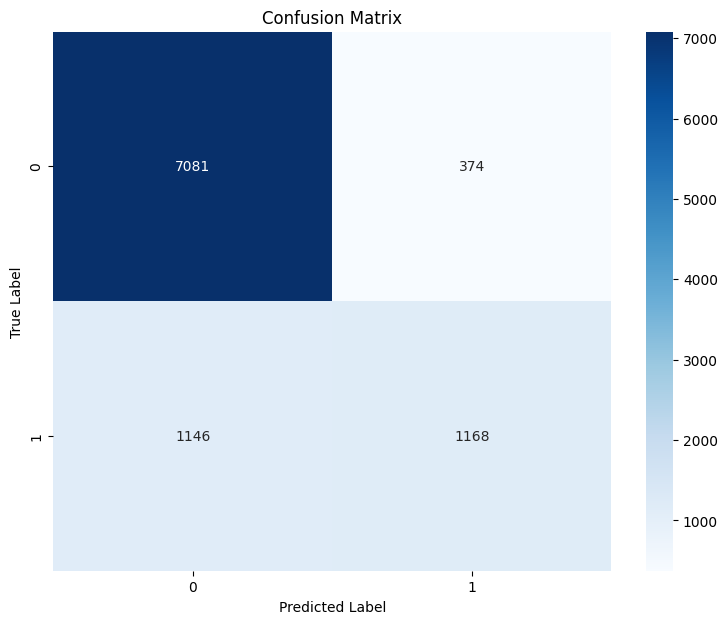

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(f"Accuracy Score: {accuracy_score(y_test, y_pred_DT)}")

# Plot the confusion matrix
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot=True, cmap=plt.cm.Blues, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

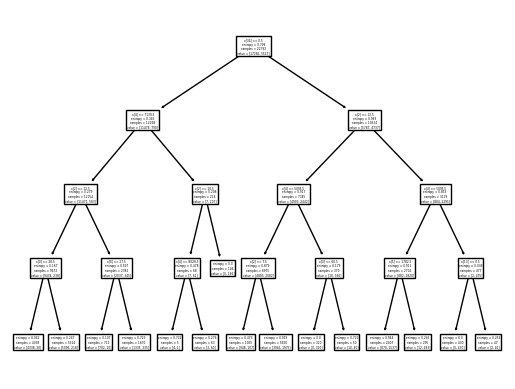

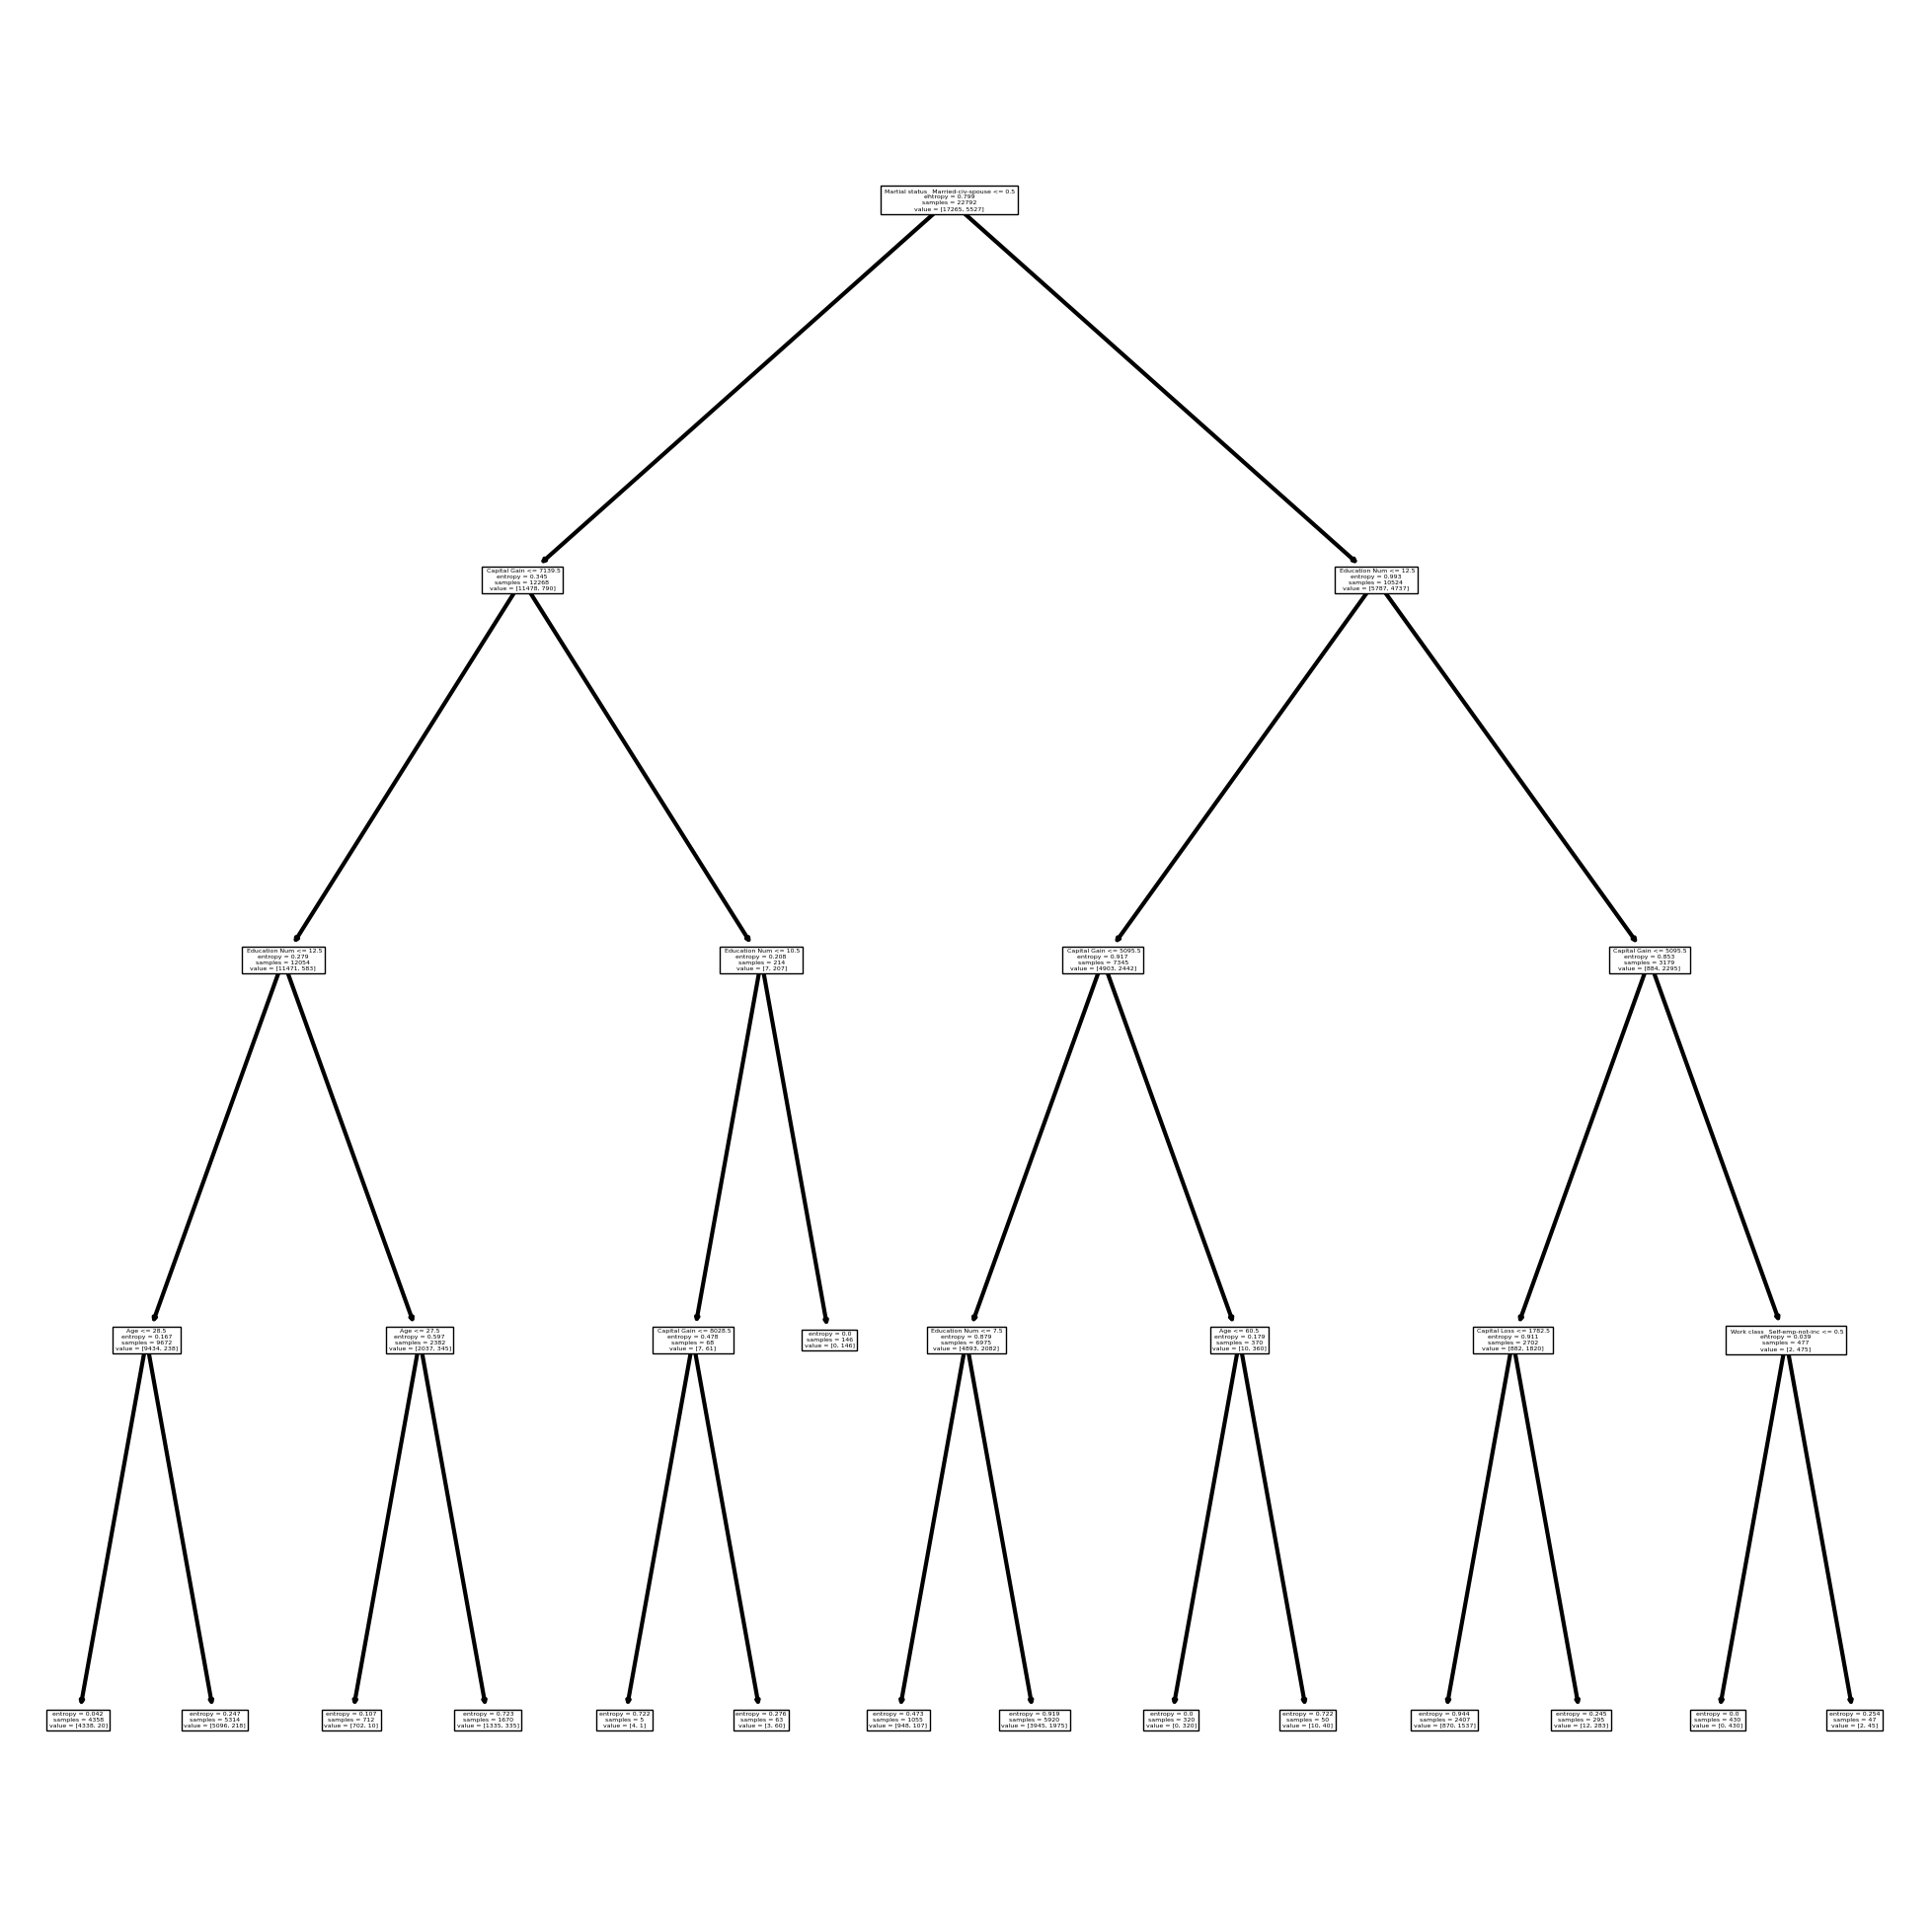

In [ ]:
from sklearn import tree
tree.plot_tree(modelDT) 


fig, ax = plt.subplots(figsize=(25, 25))
out = tree.plot_tree(modelDT, feature_names=X_train.columns.tolist())
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

Random Forest Classifier:
Accuracy score: 0.8592486436687481


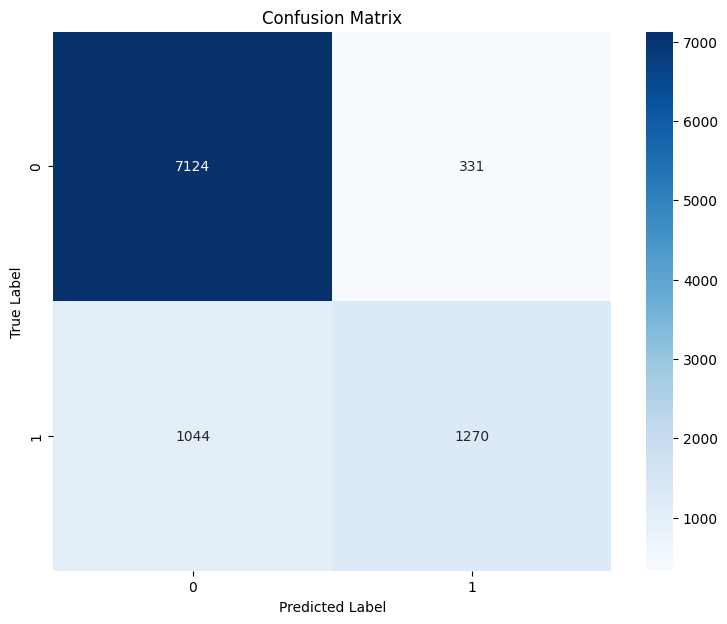

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Use the classifier to make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Calculate and print the accuracy score
print("Random Forest Classifier:")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_rf)}")

# Plot the confusion matrix
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap=plt.cm.Blues, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

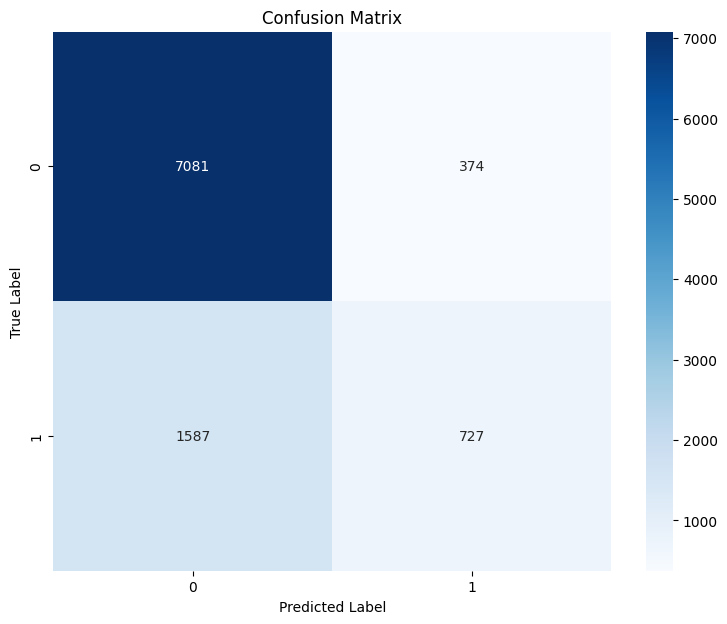

,precision,recall,f1-score,support
0,0.816913,0.949832,0.878373,7455.000000
1,0.660309,0.314175,0.425769,2314.000000
accuracy,0.799263,0.799263,0.799263,0.799263
macro avg,0.738611,0.632003,0.652071,9769.000000
weighted avg,0.779818,0.799263,0.771163,9769.000000


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Create a Gaussian Naive Bayes model
modelNB = GaussianNB()

# Fit the model on the training data
modelNB.fit(X_train, y_train)

# Make predictions on the test data
y_pred_NB = modelNB.predict(X_test)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize=(9,7))
sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate a classification report
class_report = classification_report(y_test, y_pred_NB, output_dict=True)

# Convert the classification report to a DataFrame
df_class_report = pd.DataFrame(class_report).transpose()

# Show the classification report
df_class_report

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

X = adult_df.drop(' Class', axis=1)
X_min_max = min_max_scaler.fit_transform(X)
X_standard = standard_scaler.fit_transform(X)
X_robust = robust_scaler = robust_scaler.fit_transform(X)
y = adult_df[' Class']

X_train_min_max, X_test_min_max, y_train_min_max, y_test_min_max = train_test_split(X_min_max, y, test_size = 0.3 , random_state = 42)
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y, test_size = 0.3 , random_state = 42)
X_train_robust, X_test_robust, y_train_robust, y_test_robust = train_test_split(X_robust, y, test_size = 0.3 , random_state = 42)

Accuracy on min max: 0.8444057733647251


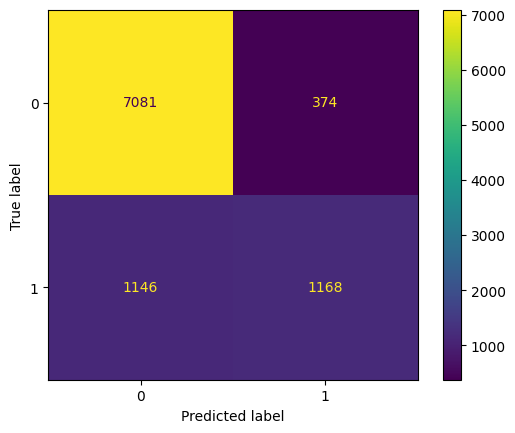

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# Testing all three scalers on DT model
modelDT.fit(X_train_min_max, y_train_min_max)
y_pred_DT_min_max = modelDT.predict(X_test_min_max)

# Same results
print(f"Accuracy on min max: {accuracy_score(y_test_min_max, y_pred_DT_min_max)}")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test_min_max, y_pred_DT_min_max))
disp.plot()

Accuracy on standard: 0.8444057733647251


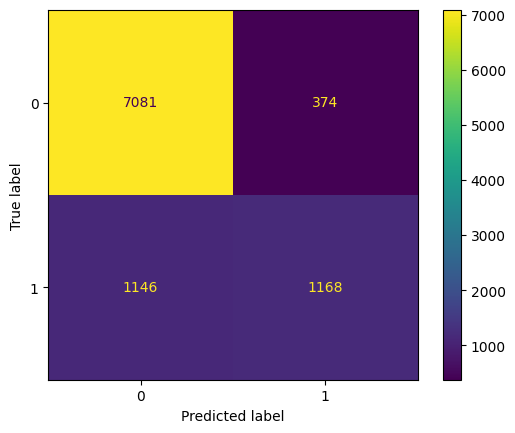

In [ ]:
modelDT.fit(X_train_standard, y_train_standard)
y_pred_DT_standard = modelDT.predict(X_test_standard)

# Same results
print(f"Accuracy on standard: {accuracy_score(y_test_standard, y_pred_DT_standard)}")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test_standard, y_pred_DT_standard))
disp.plot()

Accuracy on robust: 0.8444057733647251


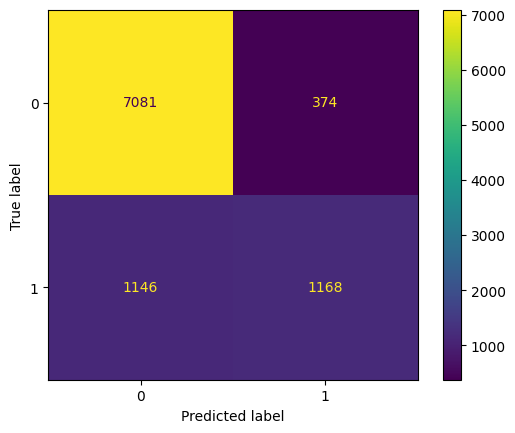

In [ ]:
# They all perform the same as original model
modelDT.fit(X_train_robust, y_train_robust)
y_pred_DT_robust = modelDT.predict(X_test_robust)

# Same results
print(f"Accuracy on robust: {accuracy_score(y_test_robust, y_pred_DT_robust)}")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test_robust, y_pred_DT_robust))
disp.plot()

Accuracy on min max: 0.8592486436687481


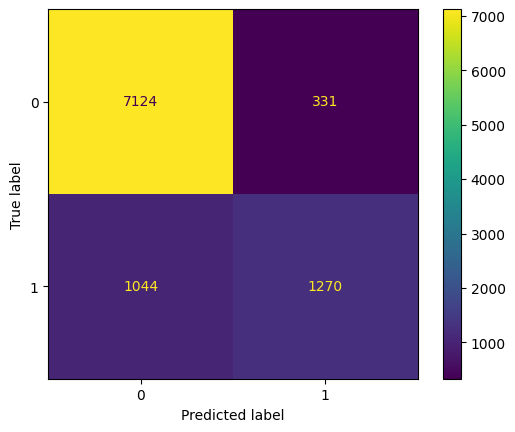

In [ ]:
# Testing all three scalers on Random forest
rf.fit(X_train_min_max, y_train_min_max)

y_pred_RF_min_max = rf.predict(X_test_min_max)

print(f"Accuracy on min max: {accuracy_score(y_test_min_max, y_pred_RF_min_max)}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test_min_max, y_pred_RF_min_max))
disp.plot()


Accuracy on standard: 0.8592486436687481


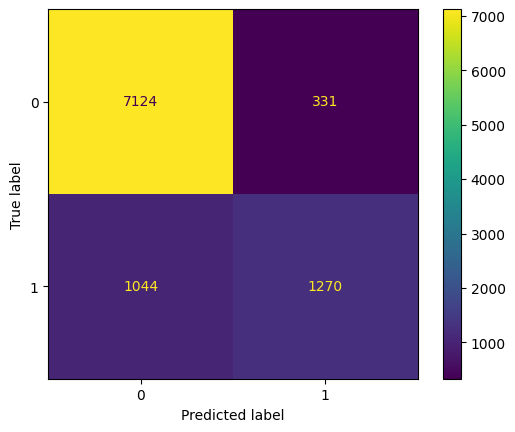

In [ ]:
rf.fit(X_train_standard, y_train_standard)

y_pred_RF_standard = rf.predict(X_test_standard)

print(f"Accuracy on standard: {accuracy_score(y_test_standard, y_pred_RF_standard)}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test_standard, y_pred_RF_standard))
disp.plot()


Accuracy on robust: 0.8593510082915344


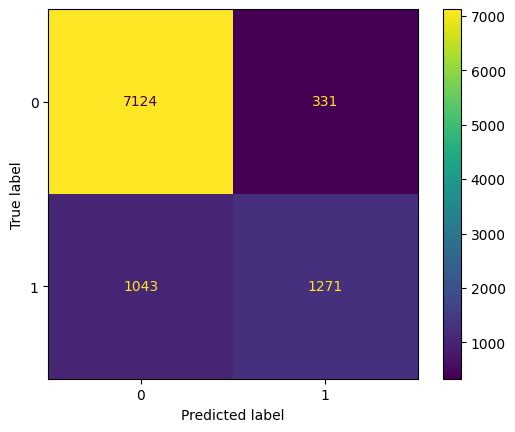

In [ ]:
rf.fit(X_train_robust, y_train_robust)

y_pred_RF_robust = rf.predict(X_test_robust)

# A tiny bit better but only at the fourth decimal place
print(f"Accuracy on robust: {accuracy_score(y_test_robust, y_pred_RF_robust)}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test_robust, y_pred_RF_robust))
disp.plot()

Accuracy on min max: 0.5022008393899069


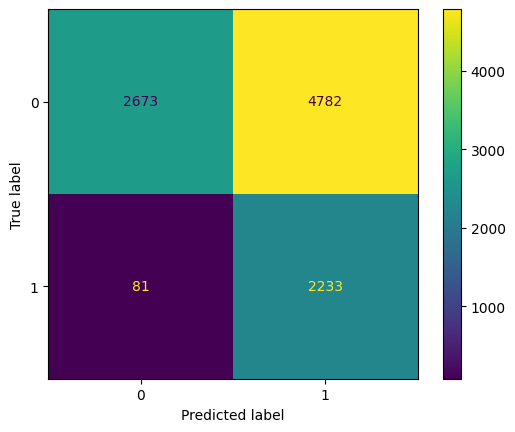

In [ ]:
modelNB.fit(X_train_min_max, y_train_min_max)

y_pred_NB_min_max = modelNB.predict(X_test_min_max)

# Did worse
print(f"Accuracy on min max: {accuracy_score(y_test_min_max, y_pred_NB_min_max)}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test_min_max, y_pred_NB_min_max))
disp.plot()

Accuracy on standard: 0.4139625345480602


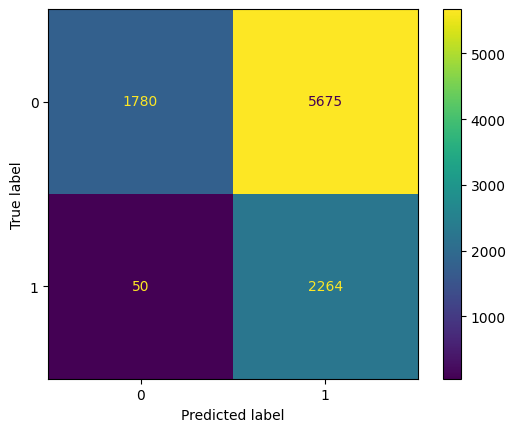

In [ ]:
modelNB.fit(X_train_standard, y_train_standard)

y_pred_NB_standard= modelNB.predict(X_test_standard)

# Did worse
print(f"Accuracy on standard: {accuracy_score(y_test_standard, y_pred_NB_standard)}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test_standard, y_pred_NB_standard))
disp.plot()

Accuracy on robust: 0.8039717473641109


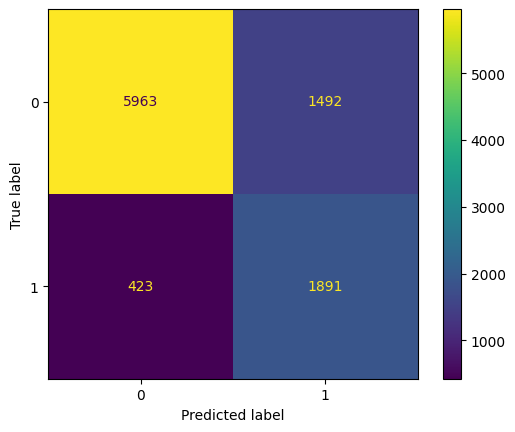

In [ ]:
modelNB.fit(X_train_robust, y_train_robust)

y_pred_NB_robust= modelNB.predict(X_test_robust)

# Did a little better actually
print(f"Accuracy on robust: {accuracy_score(y_test_robust, y_pred_NB_robust)}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test_robust, y_pred_NB_robust))
disp.plot()